Mounted at /content/drive


,0
id,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0
number_of_reviews,0
review_scores_rating,0


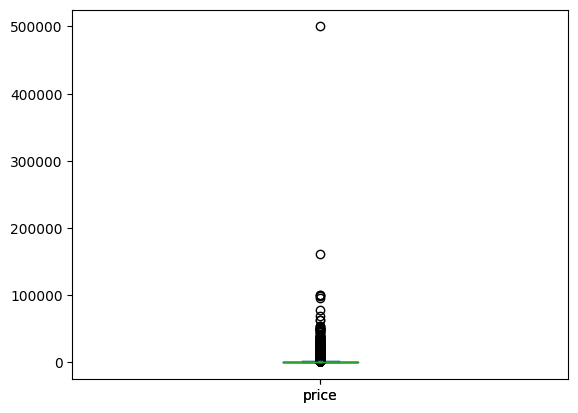

In [1]:
# Importando as bibliotecas e permissão de acesso ao drive

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


# Importação e exploração inicial - carregar o dataset

df_lista_de_hoteis = pd.read_csv('/content/drive/MyDrive/listings_cleaned.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/reviews.csv')

# Unificação das bases
df_base_unificada = df_lista_de_hoteis.merge(
    right=df_reviews[["id","number_of_reviews","review_scores_rating"]],
    on="id",
    how="left"
)

# Verificação e tratamento de dados inconsistentes
df_base_unificada.isnull().sum()

df_base_unificada['price'].mode().iloc[0]

df_base_unificada['bathrooms'] = df_base_unificada['bathrooms'].fillna(df_base_unificada['bathrooms'].mean())
df_base_unificada['bedrooms'] = df_base_unificada['bedrooms'].fillna(df_base_unificada['bedrooms'].mean())
df_base_unificada['beds'] = df_base_unificada['beds'].fillna(df_base_unificada['beds'].mean())
df_base_unificada['price'] = df_base_unificada['price'].fillna(df_base_unificada['price'].mode().iloc[0])
df_base_unificada['review_scores_rating'] = df_base_unificada['review_scores_rating'].fillna(0)
df_base_unificada['number_of_reviews'] = df_base_unificada['number_of_reviews'].fillna(0)

df_base_unificada.head()

# ============================================
# TRATAMENTO DE OUTLIERS
# ============================================

# Visualização inicial
df_base_unificada['price'].plot(kind='box')

# Cálculo do IQR
Q1 = df_base_unificada['price'].quantile(0.25)
Q3 = df_base_unificada['price'].quantile(0.75)
IQR = Q3 - Q1

# Limites para detecção de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando linhas sem outliers (removendo outliers)
df_base_unificada = df_base_unificada[
    (df_base_unificada['price'] >= limite_inferior) &
    (df_base_unificada['price'] <= limite_superior)
]

# Visualização após limpeza
df_base_unificada['price'].plot(kind='box')

# ============================================

df_base_unificada['price'].sort_values(ascending=False)

df_base_unificada['room_type'].value_counts()

df_base_unificada['room_type'] = df_base_unificada['room_type'].astype('category')

df_base_unificada['room_type_numbers'] = df_base_unificada['room_type'].cat.codes

df_base_unificada['room_type'] = df_base_unificada['room_type_numbers']

df_base_unificada['neighbourhood_cleansed'].value_counts()

target = df_base_unificada.groupby('neighbourhood_cleansed')['price'].mean()

df_base_unificada['neighbourhood_cleansed'] = df_base_unificada['neighbourhood_cleansed'].map(target)

df_base_unificada['neighbourhood_cleansed']

df_base_unificada.drop(columns=['room_type_numbers'], inplace=True)

df_base_unificada

df_base_unificada.isnull().sum()